In [20]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
 l=data['label']

In [4]:
data = data.drop("label",axis=1)

In [5]:
print(data.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


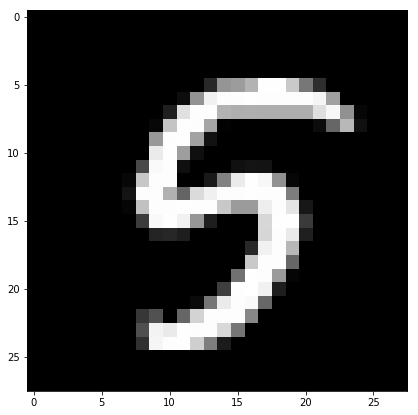

5


In [6]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 8

grid_data = data.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [7]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
sample_data = standardized_data

In [9]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [22]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (42000, 2)


C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


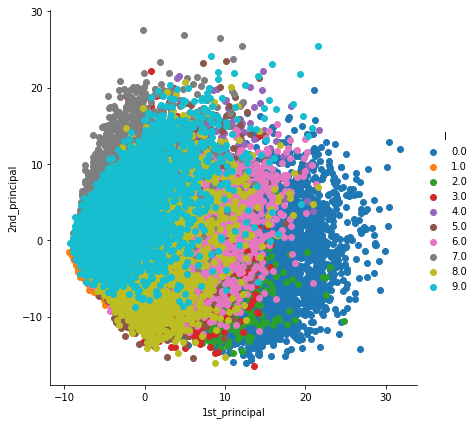

In [23]:
import seaborn as sn
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "l"))
sn.FacetGrid(pca_df, hue="l", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

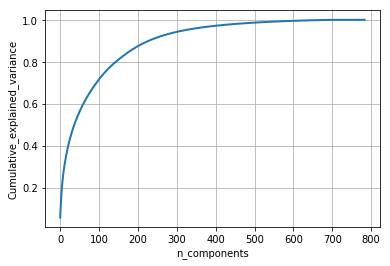

In [15]:
# PCA for dimensionality redcution (non-visualization)
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.